In [170]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

In [171]:
attendance = pd.read_csv('./Data Files/Clean Attendance Payroll and Year.csv')
population = pd.read_csv('./Data Files/2010 CSA Population by Team.csv')

In [172]:
combined = population.merge(attendance, on = 'Tm')

In [176]:
attendance = []
population = []

attendance.append(combined['Attend/G'])
population.append(combined['pop'])

population = population[0]
attendance = pd.to_numeric(attendance[0])

In [178]:
print(population.head())
print(attendance.head())

correlation = population.corr(attendance)

0    5584216
1    5584216
2    5584216
3    5584216
4    5584216
Name: pop, dtype: int64
0    31488
1    33891
2    31270
3    29304
4    30989
Name: Attend/G, dtype: int64


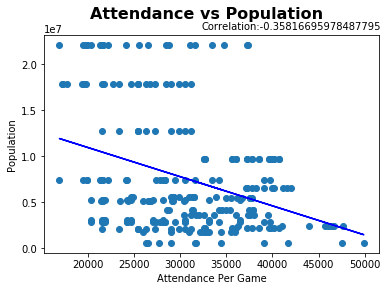

In [186]:
# Plot data

(slope, intercept, _, _, _) = linregress(attendance, population)
fit = slope * attendance + intercept

fig, ax = plt.subplots()

fig.suptitle("Attendance vs Population", fontsize=16, fontweight="bold")

ax.set_xlabel('Attendance Per Game')
ax.set_ylabel('Population')

ax.plot(attendance, population, linewidth=0, marker='o')

ax.plot(attendance, fit, 'b')

plt.figtext(.49,.9,(f"Correlation:{correlation}"))
plt.savefig('./Images/Attendance vs Population')